# Final Project for CAP6307
## Cat Baker and Darshay Blount
### Fall 2020

In [ ]:
# install modules
!pip install lyricsgenius
!pip install textblob
!python -m textblob.download_corpora

In [1]:
# import packages
from gensim.summarization import keywords
import spacy
import nltk
from nltk.corpus import stopwords
import pandas as pd
import lyricsgenius
import textblob
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# download spacy and import English
nltk.download('stopwords')
from spacy.lang.en import English

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/catbaker3/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Import stopwords
stopwords = set(stopwords.words('english'))

In [3]:
# Set the nlp language to English
nlp = English()
nlp.max_length = 10000000

In [4]:
# Set up the token, id, and secret for the Lyric Genius API
client_id = 'jGXOq14YmSS490yTKQ7CPzu8l7ui5v4JnbBvhIhQV8VV74cSTpoFEqoKo5NqRuTT'
client_secret = 'MCDsDPsZLCO10I9_cAOVZp91OAIFgx-aUDmaZ79hHQ9jgnquVkDROF1NBjlIisu9X2yG86OrGz7nJF26VB5nQw'
access_token = 'vcwFJvy8po5FLkEkeTeSbhkbfidq43zZqTxoBNLnEbL7tltCTbDRiVeLJ68AL2rG'

In [5]:
# Set up the API information
genius = lyricsgenius.Genius(access_token)

In [6]:
# Import the Billboard Top 100 dataset
billboard_100 = pd.read_csv('billboardHot100_1999-2019.csv')

In [7]:
# Preview the dataframe
billboard_100.head(10)

,Unnamed: 0,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Writing.Credits,Lyrics,Features
0,1,"Lil Nas,",Old Town Road,1,1.0,7.0,2019-07-06,"April 5, 2019","Country,Atlanta,Alternative Country,Hip-Hop,Tr...","Jozzy, Atticus ross, Trent reznor, Billy ray c...","Old Town Road Remix \nOh, oh-oh\nOh\nYeah, I'm...",Billy Ray Cyrus
1,2,"Shawn Mendes, Camila Cabello",Senorita,2,NaN,NaN,2019-07-06,"June 21, 2019",Pop,"Cashmere cat, Jack patterson, Charli xcx, Benn...",Senorita \nI love it when you call me senorita...,NaN
2,3,Billie Eilish,Bad Guy,3,2.0,13.0,2019-07-06,"March 29, 2019","Hip-Hop,Dark Pop,House,Trap,Memes,Alternative ...","Billie eilish, Finneas","bad guy \nWhite shirt now red, my bloody nose\...",NaN
3,4,Khalid,Talk,4,3.0,20.0,2019-07-06,"February 7, 2019","Synth-Pop,Pop","Howard lawrence, Guy lawrence, Khalid",Talk \nCan we just talk? Can we just talk?\nTa...,NaN
4,5,"Ed Sheeran, Justin Bieber",I Don't Care,5,2.0,7.0,2019-07-06,"May 10, 2019","Canada,UK,Dance,Dance-Pop,Pop","Ed sheeran, Justin bieber, Shellback, Max mart...",I Don't Care \nI'm at a party I don't wanna be...,NaN
5,6,Jonas Brothers,Sucker,6,1.0,17.0,2019-07-06,"March 1, 2019","Alternative Pop,Boy Band,Teen Pop,Pop-Rock,Pop","Ryan tedder, Louis bell, Frank dukes, Nick jon...",Sucker \nWe go together\nBetter than birds of ...,NaN
6,7,DaBaby,Suge,7,7.0,13.0,2019-07-06,"March 1, 2019","Trap,East Coast,Rap","Jetsonmade, Pooh beatz, Dababy","Suge \nPooh, you a fool for this one\nHa\nOh L...",NaN
7,8,Drake,Money In The Grave,8,7.0,2.0,2019-07-06,"June 15, 2019","Hip-Hop,Rap,Basketball,NBA,Canada","Asoteric, Ljay currie, Cydney christine, Rick ...","Money in the Grave \nYeah, okay\nLil CC on the...",Rick Ross
8,9,Chris Brown,No Guidance,9,9.0,3.0,2019-07-06,"June 8, 2019","Alternative R&;B,Hip-Hop,Rap,Pop,DMV,Canada,R&;B","Velous, J louis, Vinylz, Michee patrick lebrun...","No Guidance \nBefore I die I'm tryna fuck you,...",Drake
9,10,Post Malone,Wow.,10,2.0,27.0,2019-07-06,"December 24, 2018","Memes,Hip-Hop,Trap,Rap","Frank dukes, Billy walsh, Louis bell, Post malone","Wow \nSaid she tired of little money, need a b...",NaN


In [8]:
# Sort the dataframe by week ID (ascending)
billboard_100 = billboard_100.sort_values(by=['Week'])

In [9]:
# Check for null values
billboard_100.isnull().sum()

# This makes since bc the null values belong to the song's first week on the Billboard chart

Unnamed: 0             0
Artists                0
Name                   0
Weekly.rank            0
Peak.position       7069
Weeks.on.chart      7069
Week                   0
Date               12247
Genre                  0
Writing.Credits     7213
Lyrics                 0
Features           75936
dtype: int64

In [10]:
# Filter to only show songs from the last ten years (November 2010-Dec 2019 (end of dataset))
billboard_100 = billboard_100.loc[billboard_100['Week'] > '2009-07-01']

In [11]:
billboard_100 = billboard_100.drop(['Unnamed: 0', 'Writing.Credits', 'Features'], axis=1)

In [12]:
billboard_100.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49463 entries, 49402 to 0
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Artists         49463 non-null  object 
 1   Name            49463 non-null  object 
 2   Weekly.rank     49463 non-null  int64  
 3   Peak.position   45402 non-null  float64
 4   Weeks.on.chart  45402 non-null  float64
 5   Week            49463 non-null  object 
 6   Date            47597 non-null  object 
 7   Genre           49463 non-null  object 
 8   Lyrics          49463 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 3.8+ MB


In [13]:
billboard_100.shape

(49463, 9)

In [14]:
billboard_100 = billboard_100.rename(columns={'Weekly.rank':'Rank', "Peak.position":'Peak_Rank'})

In [15]:
billboard_100.head()

,Artists,Name,Rank,Peak_Rank,Weeks.on.chart,Week,Date,Genre,Lyrics
49402,Dierks Bentley,Sideways,35,35.0,12.0,2009-07-02,"February 3, 2009",Country,"Sideways \nHey girl, what's your name?\nIt's s..."
49401,Flo Rida,Sugar,34,5.0,14.0,2009-07-02,"March 31, 2009",Rap,Sugar \nDumm\nDouble dee double di\nDouble dee...
49400,Jason Mraz,I'm Yours,33,6.0,62.0,2009-07-02,"April 15, 2008","Adult Contemporary,Adult Alternative,Pop-Rock,...",I'm Yours \nWell you done done me and you bet ...
49395,Brad Paisley,Then,28,28.0,14.0,2009-07-02,"March 23, 2009",Country,Then \nI remember trying not to stare\nThe nig...
49398,Jordin Sparks,Battlefield,31,31.0,6.0,2009-07-02,"May 8, 2009","R&;B,Pop","Battlefield \nDon't try to explain your mind, ..."


## Exploratory Data Analysis

In [16]:
# Distribution of weeks on the Billboard chart
max_weeks = billboard_100.groupby('Name')['Weeks.on.chart'].max().reset_index()
max_weeks['Weeks.on.chart'].value_counts()

20.0    564
2.0     287
3.0     169
4.0     107
18.0    106
       ... 
76.0      1
79.0      1
60.0      1
65.0      1
87.0      1
Name: Weeks.on.chart, Length: 65, dtype: int64

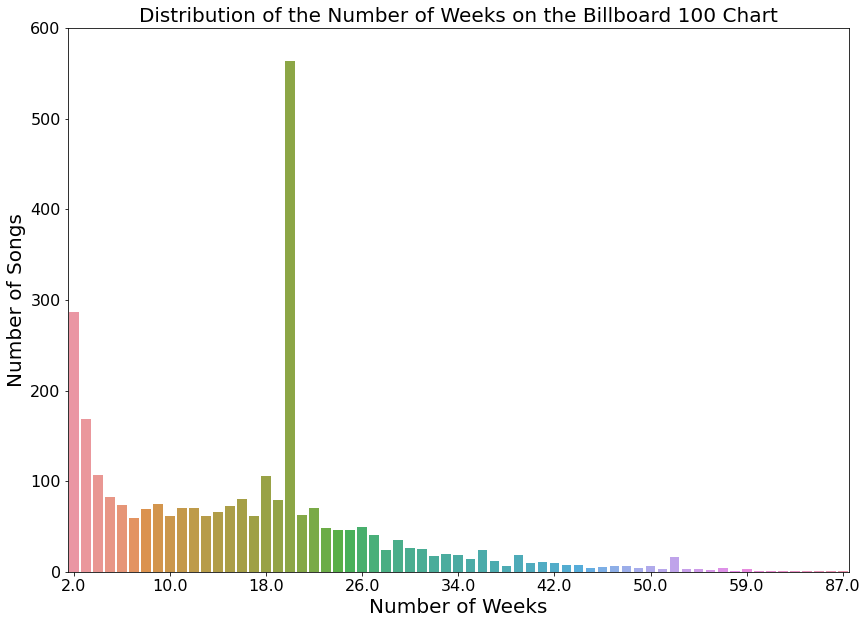

In [70]:
# Plot the distribution
plt.figure(figsize=(14,10))
sns.countplot(max_weeks['Weeks.on.chart'])
plt.title('Distribution of the Number of Weeks on the Billboard 100 Chart', fontsize=20)
plt.xlabel('Number of Weeks', fontsize=20)
plt.ylabel('Number of Songs', fontsize=20)
plt.yticks(np.arange(0, 700, 100))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.xticks(np.arange(0, 70, 8))
plt.tick_params(axis='x', which='major', labelsize=16)

In [18]:
# Look at the songs with the longest time on the charts
max_weeks.loc[max_weeks['Weeks.on.chart'] >= 55].sort_values(by = 'Weeks.on.chart', ascending=False)

,Name,Weeks.on.chart
2680,Radioactive,87.0
2838,Sail,79.0
1662,I'm Yours,76.0
703,Counting Stars,68.0
2791,Rolling In The Deep,65.0
1437,Ho Hey,62.0
792,Demons,61.0
2283,Need You Now,60.0
144,All Of Me,59.0
3026,Somebody That I Used To Know,59.0


In [19]:
# Distribution of the peak ranks on the chart
peak_positions = billboard_100.groupby('Name')['Peak_Rank'].min().reset_index()
peak_positions['Peak_Rank'].value_counts()

1.0     122
2.0      59
4.0      56
6.0      52
13.0     50
       ... 
96.0      8
98.0      7
95.0      7
97.0      6
99.0      3
Name: Peak_Rank, Length: 99, dtype: int64

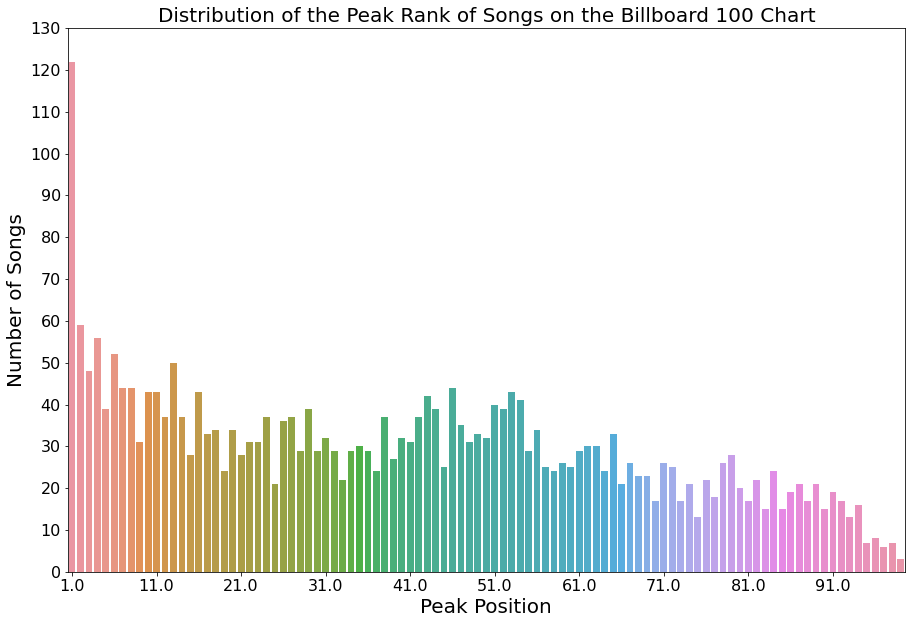

In [81]:
# Plot the distribution
plt.figure(figsize=(15,10))
sns.countplot(peak_positions['Peak_Rank'])
plt.title('Distribution of the Peak Rank of Songs on the Billboard 100 Chart', fontsize=20)
plt.xlabel('Peak Position', fontsize=20)
plt.ylabel('Number of Songs', fontsize=20)
plt.yticks(np.arange(0, 135, 10))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.xticks(np.arange(0, 100, 10))
plt.tick_params(axis='x', which='major', labelsize=16)

## Lyrics and Sentiment Analysis

In [21]:
# Get the column names 
billboard_100.columns.tolist()

['Artists',
 'Name',
 'Rank',
 'Peak_Rank',
 'Weeks.on.chart',
 'Week',
 'Date',
 'Genre',
 'Lyrics']

In [22]:
# Function to return the sentiment score for each song
def lyrics_sentiment(lyrics):    
    analysis = TextBlob(lyrics)
    return analysis.sentiment.polarity

In [23]:
# Text preprocessing
def preprocessing(text):
    document = nlp(text, disable=['ner','parser'])
    lemmas = [token.lemma_ for token in document]
    lemma_clean = [lemma for lemma in lemmas
                  if lemma.isalpha() and lemma not in stopwords]
    return ''.join(lemma_clean)

In [24]:
# Use get_lyric_sentiment to get sentiment score for all the song lyrics
sentiment = billboard_100.apply(lambda row: lyrics_sentiment(row['Lyrics']), axis =1)
billboard_100['Sentiment'] = sentiment

In [26]:
billboard_100_sentiment = billboard_100.drop_duplicates(subset=['Name'], keep='last')

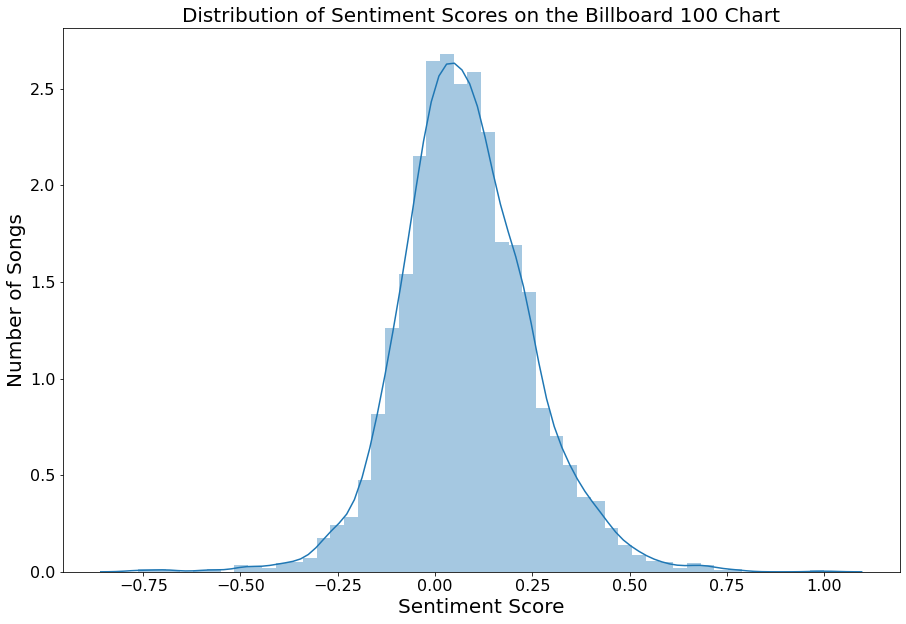

In [43]:
# Distribution of lyric sentiment score
plt.figure(figsize=(15,10))
sns.distplot(billboard_100_sentiment['Sentiment'])
plt.title('Distribution of Sentiment Scores on the Billboard 100 Chart', fontsize=20)
plt.xlabel('Sentiment Score', fontsize=20)
plt.ylabel('Number of Songs', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=16)

In [28]:
# Set the index to be the weekid
billboard_100.reset_index(inplace=True)

In [31]:
# Set the index of the dataframe to the WeekID. 
# This sets us up to resample dataframe based on time
billboard_100['Week'] = pd.to_datetime(billboard_100['Week'],infer_datetime_format=True)
billboard_100 = billboard_100.sort_values(by='Week')
billboard_100 = billboard_100.reset_index(drop=True)
billboard_100 = billboard_100.set_index('Week')

In [ ]:
#Resample dataframe lyrics by year. Get all the lyrics for every song for each year
#lyrics_resample = billboard_100['Lyrics'].resample('y').sum()

In [91]:
# Resample dataframe sentiment column by year. This arranges the mean lyric sentiment for every year
billboard_100_resample = billboard_100['Sentiment'].resample('Y').mean()

In [93]:
# Print the average sentiment scores for each year
billboard_100_resample.head(12)

Week
2009-12-31    0.109898
2010-12-31    0.115367
2011-12-31    0.094688
2012-12-31    0.114984
2013-12-31    0.104620
2014-12-31    0.082186
2015-12-31    0.086326
2016-12-31    0.091607
2017-12-31    0.070188
2018-12-31    0.045563
2019-12-31    0.068603
Freq: A-DEC, Name: Sentiment, dtype: float64

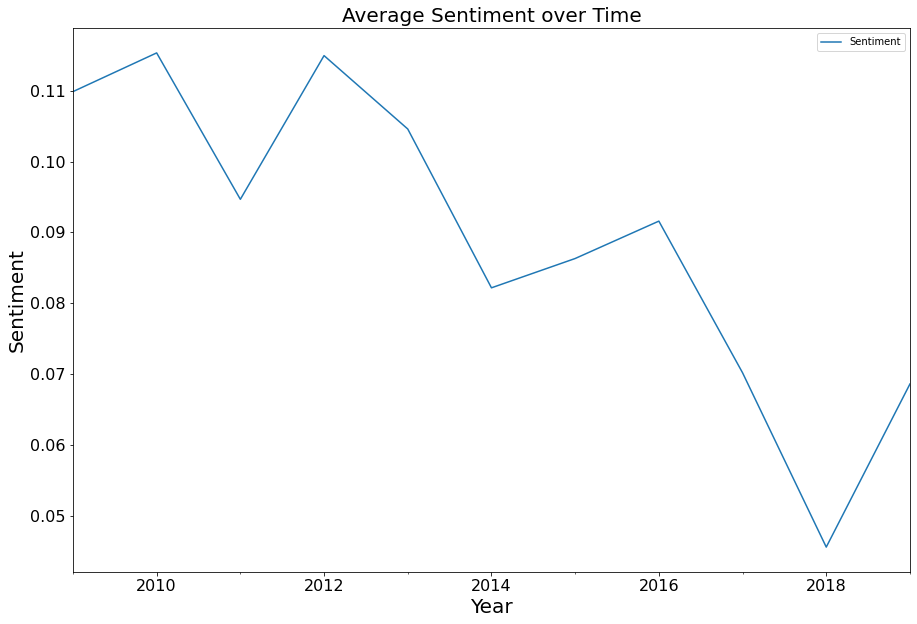

In [86]:
# Plot lyric sentiment over time
plt.figure(figsize=(15,10))
billboard_100_resample.plot(label='Sentiment', legend=True)
plt.title('Average Sentiment over Time', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Sentiment', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=16)

In [88]:
billboard_100_resample = billboard_100['Sentiment'].resample('W').mean()

Text(0, 0.5, 'Sentiment')

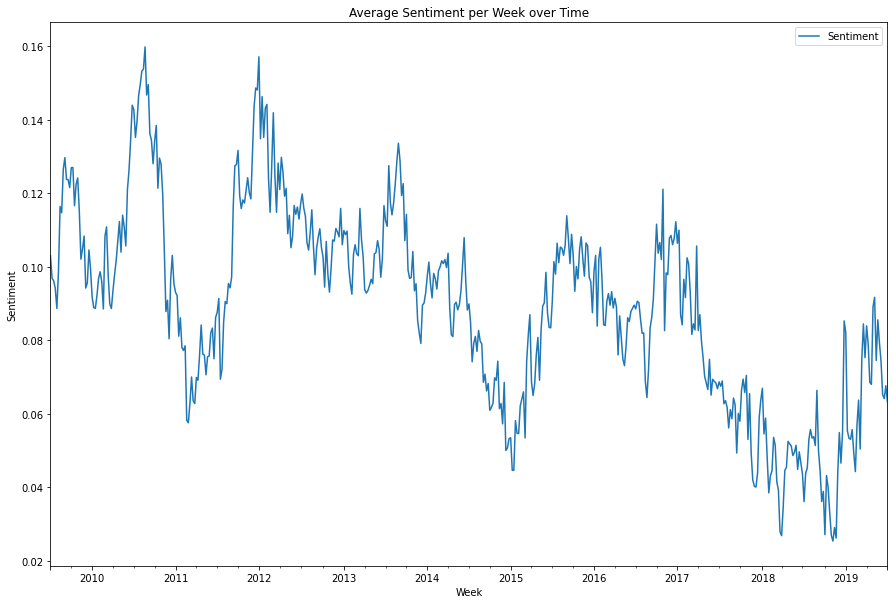

In [35]:
#Plot lyric sentiment over time
plt.figure(figsize=(15,10))
billboard_100_resample.plot(label='Sentiment', legend=True)
plt.title('Average Sentiment per Week over Time')
plt.xlabel('Week')
plt.ylabel('Sentiment')

## Text Analysis

In [ ]:
# Change all to lowercase and remove all punctuation
def clean_text(x):
    punc='!"'',.@#$%^&*()-_+:;?><[]{}`~1234567890'
    lowercase = x.lower()
    for ch in punc:
        lowercase = lowercase.replace(ch,'')
    return lowercase

billboard_100['Lyrics'] = billboard_100['Lyrics'].apply(clean_text)

In [ ]:
# Keyword extraction
def keyword_extract(texts):
    xkeywords = []
    values = keywords(text=preprocessing(texts), split='\n', scores=True)
    for x in values[:10]:
        xkeywords.append(x[0])
    try:
        return xkeywords
    except:
        return 'there is no content'

In [ ]:
billboard_100.reset_index(inplace=True)

In [ ]:
pd.to_datetime(billboard_100['Week'], infer_datetime_format = True)

In [ ]:
# Convert the weeks column to datetime
def unique(list1):
   # intilize a null list
     unique_list = []
   # traverse for all elements
     for x in list1:
         # check if exists in unique_list or not
         if x not in unique_list:
              unique_list.append(x)
     return unique_list

In [ ]:
#Stores unique words of each lyrics song into a new column called words
#list used to store the words
words = []
#iterate trought each lyric and split unique words appending the result into the words list
billboard_100 = billboard_100.reset_index(drop=True)
for word in billboard_100['Lyrics'].tolist():
    words.append(unique(lyrics_to_words(word).split()))
#create the new column with the information of words lists
billboard_100['Words'] = words
billboard_100.head()

In [ ]:
# Create dataframes for each individual year

In [ ]:
# Data from 2009
billboard_2009 = billboard_100.loc[(billboard_100['Week'] >= '2009-01-01') & (billboard_100['Week'] <= '2009-12-31')]

In [ ]:
# Data from 2010
billboard_2010 = billboard_100.loc[(billboard_100['Week'] >= '2010-01-01') & (billboard_100['Week'] <= '2010-12-31')]

In [ ]:
# Data from 2011
billboard_2011 = billboard_100.loc[(billboard_100['Week'] >= '2011-01-01') & (billboard_100['Week'] <= '2011-12-31')]

In [ ]:
# Data from 2012
billboard_2012 = billboard_100.loc[(billboard_100['Week'] >= '2012-01-01') & (billboard_100['Week'] <= '2012-12-31')]

In [ ]:
# Data from 2013
billboard_2013 = billboard_100.loc[(billboard_100['Week'] >= '2013-01-01') & (billboard_100['Week'] <= '2013-12-31')]

In [ ]:
# Data from 2014
billboard_2014 = billboard_100.loc[(billboard_100['Week'] >= '2014-01-01') & (billboard_100['Week'] <= '2014-12-31')]

In [ ]:
# Data from 2015
billboard_2015 = billboard_100.loc[(billboard_100['Week'] >= '2015-01-01') & (billboard_100['Week'] <= '2015-12-31')]

In [ ]:
# Data from 2016
billboard_2016 = billboard_100.loc[(billboard_100['Week'] >= '2016-01-01') & (billboard_100['Week'] <= '2016-12-31')]

In [ ]:
# Data from 2017
billboard_2017 = billboard_100.loc[(billboard_100['Week'] >= '2017-01-01') & (billboard_100['Week'] <= '2017-12-31')]

In [ ]:
# Data from 2018
billboard_2018 = billboard_100.loc[(billboard_100['Week'] >= '2018-01-01') & (billboard_100['Week'] <= '2018-12-31')]

In [ ]:
# Data from 2019
billboard_2019 = billboard_100.loc[(billboard_100['Week'] >= '2019-01-01') & (billboard_100['Week'] <= '2019-12-31')]

In [ ]:
keyword_extract(lyrics_2009)

In [ ]:
# 2009 
# Get the lyrics
lyrics_2009 = billboard_2009['Lyrics'].sum()

from rake_nltk import Rake

r = Rake()

r.extract_keywords_from_text(lyrics_2009)

r.get_ranked_phrases()

In [ ]:
keyword_extract(lyrics_2009)

In [ ]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

def remove_stopwords(text): 
    stop_words = set(stopwords.words("english")) 
    word_tokens = word_tokenize(text) 
    filtered_text = [word for word in word_tokens if word not in stop_words] 
    return filtered_text 

In [ ]:
# 2009 
# Get the lyrics
lyrics_2009 = billboard_2009['Lyrics'].sum()

# Use return_keywords function on lyrics_resample to get the top 20 keywords for each year
keywords_2009 = [keyword_extract for x in lyrics_2009]

# Put lyric_keywords into a DataFrame and include lyrics_resample and hot100_resample
keywords_2009 = pd.DataFrame(keywords_2009, columns = ['Keywords'])
keywords_2009 = keywords_2009.set_index(lyrics_2009.index)
keywords_2009['Lyrics'] = lyrics_2009
keywords_2009['Sentiment'] = lyrics_2009

In [ ]:
# Compute the lexical richness of each song

def lexical_richness(text):
    return len(set(text))/len(text)

texts = billboard_100['Lyrics']  #Will this line work??

lexicalrichness = [lexical_richness(text) for text in texts]

billboard_100['lexicalrichness'] = lexicalrichness

billboard_100.sort_values(by='lexical_richness', ascending=False)

In [ ]:
# Tokens of each song
tokens = [len(text) for text in texts]

billboard_100['tokens'] = tokens

In [ ]:
# Types of each song 
types = [len(set(text)) for text in texts]

billboard_100['types'] = types

In [ ]:
billboard_100['tokens'] = billboard_100['tokens'].apply(lambda x: float(x))
billboard_100['types'] = billboard_100['types'].apply(lambda x: float(x))

In [ ]:
# Type-to-token ratio
ttr = billboard_100['types']/billboard_100['tokens']

billboard_100['TTR'] = ttr

In [ ]:
billboard_100.head()

In [ ]:
billboard_100_resample = billboard_100['TTR'].resample('W').mean()

In [ ]:
#Plot lyric sentiment over time
billboard_100_resample.plot(label='TTR', legend=True)
plt.title('Average Type-to-Token Ratio per Week over Time')
plt.xlabel('Week')
plt.ylabel('Sentiment')

In [ ]:
#Compute the word count of each song and create a word count column
#then plot the word count dist



